In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [3]:
train = pd.read_csv("./LP-IV-datasets/CIFR(Ass2&3)/train_data.csv")
test = pd.read_csv("./LP-IV-datasets/CIFR(Ass2&3)/test_data.csv")

In [4]:
x_train = train.drop(['label'],axis = 1).values
y_train = train['label'].values

In [5]:
x_test = test.drop(['label'],axis = 1).values
y_test = test['label'].values

In [6]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [7]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [8]:
x_train = x_train.reshape((50000,32,32,3))
x_test = x_test.reshape((10000,32,32,3))

In [11]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation = 'softmax'))
model.compile(optimizer='adam',metrics = ['accuracy'], loss = SparseCategoricalCrossentropy())
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 7200)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               921728    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                      

In [14]:
epochs = 11
H = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs = epochs)

Epoch 1/11
 245/1563 [===>..........................] - ETA: 20s - loss: 0.7088 - accuracy: 0.7439

KeyboardInterrupt: 

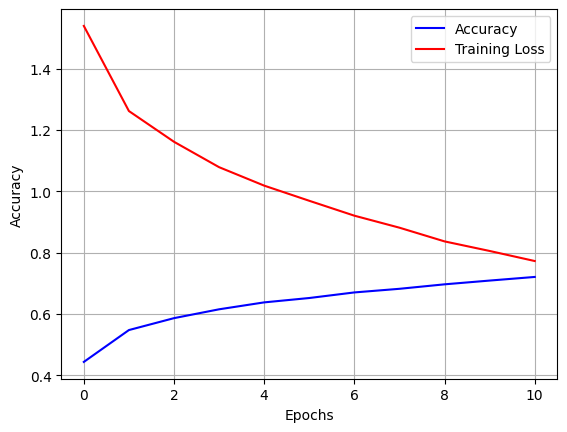

In [17]:
plt.plot(range(0,epochs),H.history['accuracy'],color = 'blue', label = 'Accuracy')
plt.plot(range(0,epochs),H.history['loss'],color = 'red', label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()

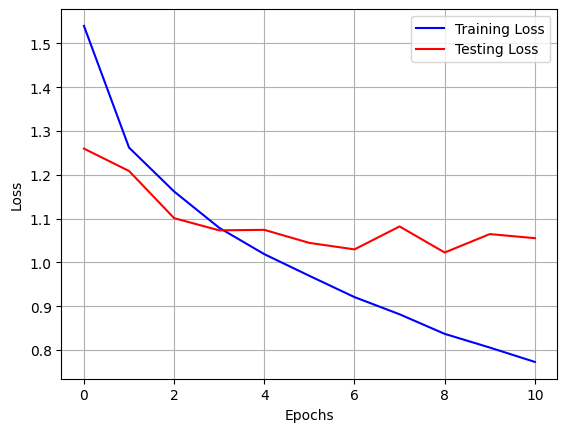

In [18]:
plt.plot(range(0,epochs),H.history['loss'],color = 'blue', label = 'Training Loss')
plt.plot(range(0,epochs),H.history['val_loss'],color = 'red', label='Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend()